In [36]:
from sunpy.map import Map
import astropy.units as u

In [1]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import numpy as np

In [2]:
f = '/Users/schriste/Developer/repositories/jupyter-notebooks/foxsi2.hdf5'

In [3]:
h = h5py.File(f, 'r')

In [4]:
h['level2']

<HDF5 group "/level2" (7 members)>

In [5]:
launch_time = datetime.datetime.strptime(h.attrs['launch_time'], h.attrs['time format'])

In [6]:
for i, col in enumerate(h['level2/detector0']):
    if i == 0:
        det0 = pd.DataFrame(data=h['level2/detector0'][col][:], columns=[col])
    else:
        data = h['level2/detector0'][col][:]
        if len(data.shape) == 1:
            det0[col] = pd.DataFrame(data=data)
        else:
            det0[col+'_x'] = pd.DataFrame(data=data[:,0])
            det0[col+'_y'] = pd.DataFrame(data=data[:,1])

In [7]:
det0

,altitude,detector_number,energy1,energy2,error_flag,frame_counter,frame_time,hit_xy_det_x,hit_xy_det_y,hit_xy_payload_x,...,hit_xy_solar_x,hit_xy_solar_y,hv,inflight,livetime,pitch,temperature,trigger_time,wsmr_time,yaw
0,0,0,0.000000,7.176807,102,389881,7804291212,124,0,548.052490,...,584.899353,-382.299866,200,1,0,36.846855,0,0,69129.74508,-17.553268
1,0,0,0.000000,NaN,115,391367,7834011346,127,0,551.081360,...,576.497192,-437.902924,200,1,0,25.415852,0,0,69132.71713,15.043264
2,0,0,0.000000,NaN,102,391511,7836891359,127,0,551.081360,...,574.888367,-438.017761,200,1,0,23.807032,0,0,69133.00513,15.158101
3,0,0,0.000000,0.000000,38,392209,7850851421,0,0,422.859650,...,428.216095,545.113525,200,1,0,5.356440,0,33040,69134.40113,5.967831
4,0,0,0.000000,4.947250,38,392924,7865151484,123,0,547.042847,...,609.944519,-418.762939,200,1,0,62.901691,0,46755,69135.83115,26.578625
5,0,0,0.000000,5.160343,38,394623,7899131634,63,0,486.465668,...,-1046.044678,48.079834,200,1,0,-1532.510376,0,13792,69139.22918,19.865425
6,0,0,0.000000,0.000000,103,394732,7901311644,0,0,422.859650,...,-1109.650757,535.865845,200,1,0,-1532.510376,0,0,69139.44718,15.215518
7,0,0,6.113319,32.292072,4,394745,7901571645,120,62,68.546745,...,-1463.963623,-438.201721,200,1,0,-1532.510376,0,26110,69139.47320,6.427502
8,0,0,0.000000,0.000000,38,395279,7912251692,0,0,422.859650,...,-1109.650757,2013.523438,200,1,0,-1532.510376,0,26181,69140.54121,-1462.442139
9,0,0,176.174011,65.107773,0,395625,7919171722,114,19,392.248566,...,-1140.261841,591.316345,200,1,0,-1532.510376,0,48050,69141.23321,-933.664001


# Figuring out the time offset

In [8]:
det0.wsmr_time.describe()

count     6539.000000
mean     69278.795830
std         97.272623
min      69129.745080
25%      69206.734810
50%      69259.258180
75%      69320.357500
max      69576.826740
Name: wsmr_time, dtype: float64

In [9]:
import datetime

In [10]:
(det0.wsmr_time.max() - det0.wsmr_time.min())/60.0

7.4513610000001789

In [11]:
launch_time

datetime.datetime(2014, 12, 11, 19, 11, 1)

In [14]:
str(datetime.datetime(2014,12,11) + datetime.timedelta(seconds=det0.wsmr_time.min()))

'2014-12-11 19:12:09.745080'

In [15]:
str(datetime.datetime(2014,12,11) + datetime.timedelta(seconds=det0.wsmr_time.max()))

'2014-12-11 19:19:36.826740'

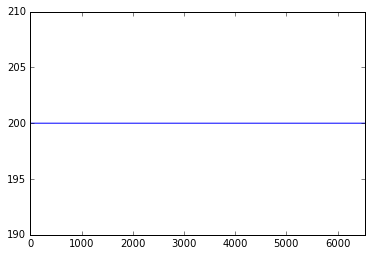

In [16]:
det0.hv.plot()

In [18]:
det0.hv

0       200
1       200
2       200
3       200
4       200
5       200
6       200
7       200
8       200
9       200
10      200
11      200
12      200
13      200
14      200
15      200
16      200
17      200
18      200
19      200
20      200
21      200
22      200
23      200
24      200
25      200
26      200
27      200
28      200
29      200
       ... 
6509    200
6510    200
6511    200
6512    200
6513    200
6514    200
6515    200
6516    200
6517    200
6518    200
6519    200
6520    200
6521    200
6522    200
6523    200
6524    200
6525    200
6526    200
6527    200
6528    200
6529    200
6530    200
6531    200
6532    200
6533    200
6534    200
6535    200
6536    200
6537    200
6538    200
Name: hv, dtype: uint16

This file only contains times when the detectors are at 200 V!

voltage ramp up command is sent 30 s into the flight

In [ ]:
#det0.hv[det0.hv > 2].plot()

In [ ]:
#det0.wsmr_time[det0.hv > 2].min()

In [ ]:
#(det0.wsmr_time[det0.hv > 100].min() - det0.wsmr_time[det0.hv > 100].max())/60.0

In [ ]:
#time_offset = datetime.datetime(2014,12,11) + datetime.timedelta(seconds=64531.692650000005) - (launch_time + datetime.timedelta(seconds=30))

here is the time offset

In [ ]:
#str(time_offset)

In [ ]:
#det0['time'] = [datetime.datetime(2014,12,11) + datetime.timedelta(seconds=t) - time_offset for t in det0.wsmr_time]

In [19]:
det0['time'] = [datetime.datetime(2014,12,11) + datetime.timedelta(seconds=t) for t in det0.wsmr_time]
det0.time

0      2014-12-11 19:12:09.745080
1      2014-12-11 19:12:12.717130
2      2014-12-11 19:12:13.005130
3      2014-12-11 19:12:14.401130
4      2014-12-11 19:12:15.831150
5      2014-12-11 19:12:19.229180
6      2014-12-11 19:12:19.447180
7      2014-12-11 19:12:19.473200
8      2014-12-11 19:12:20.541210
9      2014-12-11 19:12:21.233210
10     2014-12-11 19:12:21.609220
11     2014-12-11 19:12:21.733230
12     2014-12-11 19:12:21.801210
13     2014-12-11 19:12:21.805220
14     2014-12-11 19:12:21.813230
15     2014-12-11 19:12:21.817230
16     2014-12-11 19:12:21.819210
17     2014-12-11 19:12:21.827210
18     2014-12-11 19:12:21.849220
19     2014-12-11 19:12:21.851210
20     2014-12-11 19:12:21.859220
21     2014-12-11 19:12:21.861210
22     2014-12-11 19:12:21.981210
23     2014-12-11 19:12:24.247240
24     2014-12-11 19:12:27.239280
25     2014-12-11 19:12:28.033280
26     2014-12-11 19:12:28.127290
27     2014-12-11 19:12:28.249280
28     2014-12-11 19:12:28.445280
29     2014-12

In [20]:
det0 = det0.set_index('time')

Now that UT time is now available we can look at only the data during the flight

In [21]:
#time_obs_start = '2014-12-11 19:12:51'
#time_obs_end = '2014-12-11 19:19:25'
#obs_det0 = det0[time_obs_start: time_obs_end]
obs_det0 = det0

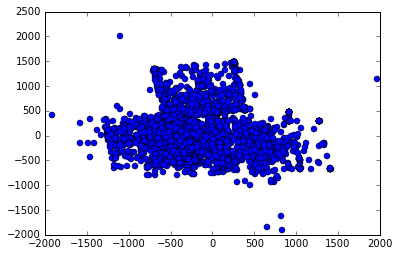

In [22]:
x = obs_det0.hit_xy_solar_x
y = obs_det0.hit_xy_solar_y
plt.plot(x, y, 'o')

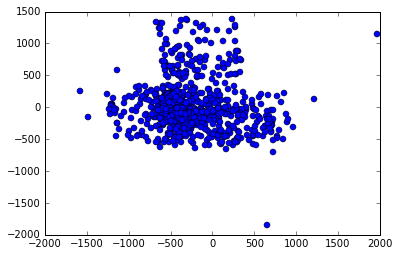

In [23]:
con1 = obs_det0.error_flag == 0
con2 = obs_det0.energy2 > 5
final_con = con1 & con2

x = obs_det0[final_con].hit_xy_solar_x
y = obs_det0[final_con].hit_xy_solar_y
plt.plot(x, y, 'o')

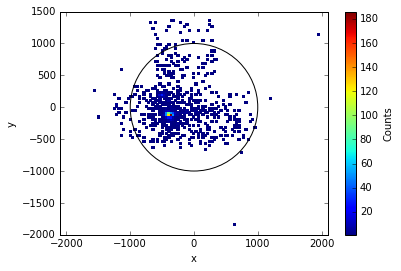

In [24]:
# Estimate the 2D histogram
nbins = 100
H, xedges, yedges = np.histogram2d(x,y,bins=nbins)
 
# H needs to be rotated and flipped
H = np.rot90(H)
H = np.flipud(H)
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero
 
# Plot 2D histogram using pcolor
fig2 = plt.figure()
plt.pcolormesh(xedges,yedges,Hmasked)
plt.axis("equal")
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
circle1 = plt.Circle((0, 0), radius=1000, fill=False)
fig = plt.gcf()
fig.gca().add_artist(circle1)

(-500, 100)

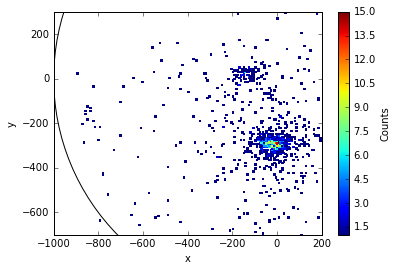

In [97]:
# Estimate the 2D histogram
nbins = 500
offset = [360.,-180.]
H, xedges, yedges = np.histogram2d(x+offset[0],y+offset[1],bins=nbins)

# H needs to be rotated and flipped
H = np.rot90(H)
H = np.flipud(H)
# Mask zeros
Hmasked = np.ma.masked_where(H==0,H) # Mask pixels with a value of zero
 
# Plot 2D histogram using pcolor
fig2 = plt.figure()
plt.pcolormesh(xedges,yedges,Hmasked)
plt.axis("equal")
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
circle1 = plt.Circle((0, 0), radius=1000, fill=False)
fig = plt.gcf()
fig.gca().add_artist(circle1)
plt.xlim(-1000, 200)
plt.ylim(-500, 100)

In [98]:
cdelt1 = np.abs(xedges[0] - xedges[1])
cdelt2 = np.abs(yedges[0] - yedges[1])

In [108]:
xedges[0]

-1222.4758

In [109]:
header = {'cdelt1': cdelt1, 'cdelt2': cdelt2, 
          'telescop':'foxsi',
          'crval1': xedges[0], 'crval2': yedges[0], 
          'crpix1': 0, 'crpix2': 0,
          'r_sun':aia_map.meta['r_sun'], 
          'dsun_obs':aia_map.meta['dsun_obs'],
          "rsun_ref": aia_map.meta['rsun_ref'],
          "rsun_obs": aia_map.meta['rsun_obs'],
          "hglt_obs": aia_map.meta['hglt_obs'],
          "rsun_obs": aia_map.meta['rsun_obs']}
foxsi_map = Map((Hmasked, header))

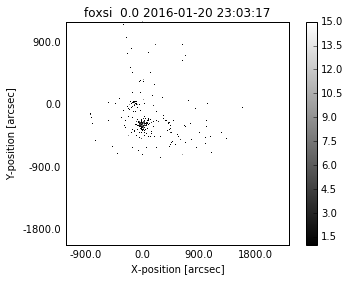

In [110]:
foxsi_map.plot()
foxsi_map.draw_limb();
foxsi_map.draw_grid();
plt.colorbar()

In [111]:
aia_map.meta

OrderedDict([('dsun_obs', 147274099595.0),
             ('t_obs', '2014-12-11T19:11:02.57Z'),
             ('simple', True),
             ('datavals', 16777216),
             ('aimgshen', 12),
             ('aimshctc', 2941.791992),
             ('aiftsid', 40961),
             ('datap10', 0.0),
             ('roi_llx1', -2147483648),
             ('datap95', 10.0),
             ('roi_llx2', -2147483648),
             ('datap90', 7.0),
             ('aivnmst', 453),
             ('datap98', 15.0),
             ('datap99', 20.0),
             ('aicfgdl4', 236),
             ('crlt_obs', -0.45515),
             ('aicfgdl1', 0),
             ('aicfgdl2', 23),
             ('aicfgdl3', 87),
             ('totvals', 16777216),
             ('acs_mode', 'SCIENCE'),
             ('crota2', 0.0),
             ('aimshobe', 67.379997),
             ('aimshobc', 53.924),
             ('trecroun', 1),
             ('aihis860', 8388608),
             ('r_sun', 1624.64450378),
             ('orb_rec

In [112]:
aia = '/Users/schriste/Data/FOXSI-2-flight/aia/AIA20141211_191101_0094.fits'

In [113]:
aia_map = Map(aia)

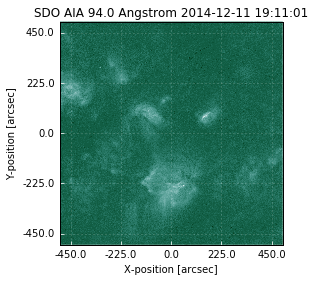

In [114]:
samap = aia_map.submap(u.Quantity([-500, 500], 'arcsec'), u.Quantity([-500, 500], 'arcsec'))
samap.plot()

In [115]:
sfmap = foxsi_map.submap(u.Quantity([-500, 500], 'arcsec'), u.Quantity([-500, 500], 'arcsec'))

In [136]:
cmap = Map([samap, sfmap], composite=True)
cmap.set_levels(1, np.arange(10,100,5), percent=True)

(-400, -200)

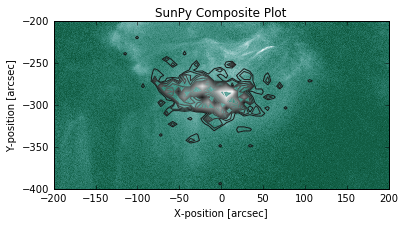

In [139]:
cmap.plot()
plt.xlim(-200,200)
plt.ylim(-400, -200)

In [122]:
cmap.set_levels(0, np.arange(0,100,10), percent=True)

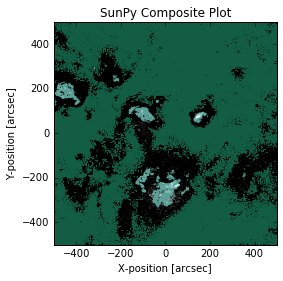

In [123]:
cmap.plot()